# AO Telemetry

The Keck Adaptive Optics System records continuously the status of its subsystems during science exposures, saved as telemetry. This notebook gives an introduction to the file formats and how to interact with them. 

This notebook is broken down into 5 parts. In the first part, interaction with individual telemetry files are presented. In the second part, some analyses on individual telemetry files are given, along the way we include questions unresolved. In the third part, two tables (one for parameters extracted from telemetry files and one for atmospheric metadata) are shown and could be accessed. The last two parts are summaries.

All of the files loaded in this notebook are shared in google drive folder "2019_cfao_retreat_public" --> "ao_telemetry".

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
from math import sqrt, pi
from astropy.table import Table
import math
from astropy.stats import sigma_clip
from matplotlib import cm
import matplotlib as mpl

There are two ways to access the notebook. 

Either download the whole folder with all files, (roughly 500 MB),

or go to the shared google drive folder, go to "ao_telemetry", click "add to my drive", so that the folder could be found and accessed, and then open the notebook via google colab.

In [0]:
from google.colab import drive   ## if download the whole folder, skip this step
drive.mount('/content/drive')    ## if download the whole folder, skip this step

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd                 ## if download the whole folder, skip this step

In [0]:
cd content/drive   ## if download the whole folder, skip this step

In [0]:
cd My\ Drive       ## if download the whole folder, skip this step

In [0]:
cd ao_telemetry/   ## if download the whole folder, skip this step

## Part 1: Intro to Telemetry Structure:

There are 5 different telemetry files presented in the shared google drive folder "ao_telemetry" --> "Telemetry Files". These 5 files were taken originally at the same day: May 5th, 2017.
The file names are:

n0128_LGS_trs.sav

n0129_LGS_trs.sav

n0130_LGS_trs.sav

n0131_LGS_trs.sav

n0132_LGS_trs.sav

### Read Individual file:

Choose any one of the telemetry file under the folder "Telemetry Files":

In [0]:
testfile1 = "Telemetry Files/n0130_LGS_trs.sav"
data = readsav(testfile1)

In [0]:
data.keys() ## list out the data structures

dict_keys(['a', 'b', 'uid', 'cid', 'nrec', 'rx', 'cent_origin', 'dm_origin', 'dtt_offset', 'tstamp_num', 'tstamp_str_start', 'cent_g', 'dm_servo', 'dt_servo', 'apd_imat', 'apd_sky_back', 'apd_threshold', 'header'])

Under "data", we mainly focus on data structure "a" and "b":
According to "Keck Adaptive Optics Note 1165", the data structure "a" and "b" are ones holding the time varying AO control loop telemetry data. The structure "a" holds the WFS data and structure "b" holds the STRAP tip/tilt data essential for the LGS case. 

Then, we can expand to see the columns within both "a" and "b":

Some explanations and units of different parameters are provided in the file $\textbf{Keck Adaptive Optics Note 1165}$ shared in the same google drive folder. 

In [0]:
data.a.dtype.fields

mappingproxy({'CONF_ID': (dtype('O'), 0, 'conf_id'),
              'DMCOMMAND': (dtype('O'), 40, 'dmcommand'),
              'DMCOMMANDSCLIPPED': (dtype('O'), 48, 'dmcommandsclipped'),
              'OFFSETCENTROID': (dtype('O'), 24, 'offsetcentroid'),
              'RESIDUALRMS': (dtype('O'), 56, 'residualrms'),
              'RESIDUALWAVEFRONT': (dtype('O'), 32, 'residualwavefront'),
              'SUBAPINTENSITY': (dtype('O'), 16, 'subapintensity'),
              'TIMESTAMP': (dtype('O'), 8, 'timestamp'),
              'TTCOMMANDS': (dtype('O'), 64, 'ttcommands'),
              'TTCOMMANDSCLIPPED': (dtype('O'), 80, 'ttcommandsclipped'),
              'TTSTRAINGAUGE': (dtype('O'), 72, 'ttstraingauge'),
              'conf_id': (dtype('O'), 0, 'conf_id'),
              'dmcommand': (dtype('O'), 40, 'dmcommand'),
              'dmcommandsclipped': (dtype('O'), 48, 'dmcommandsclipped'),
              'offsetcentroid': (dtype('O'), 24, 'offsetcentroid'),
              'residualrms': (dty

In [0]:
data.b.dtype.fields

mappingproxy({'APDCOUNTS': (dtype('O'), 16, 'apdcounts'),
              'CONF_ID': (dtype('O'), 0, 'conf_id'),
              'DTTCENTROIDS': (dtype('O'), 24, 'dttcentroids'),
              'DTTCOMMANDS': (dtype('O'), 32, 'dttcommands'),
              'DTTCOMMANDSCLIPPED': (dtype('O'), 48, 'dttcommandsclipped'),
              'DTTSTRAINGAUGE': (dtype('O'), 40, 'dttstraingauge'),
              'TIMESTAMP': (dtype('O'), 8, 'timestamp'),
              'apdcounts': (dtype('O'), 16, 'apdcounts'),
              'conf_id': (dtype('O'), 0, 'conf_id'),
              'dttcentroids': (dtype('O'), 24, 'dttcentroids'),
              'dttcommands': (dtype('O'), 32, 'dttcommands'),
              'dttcommandsclipped': (dtype('O'), 48, 'dttcommandsclipped'),
              'dttstraingauge': (dtype('O'), 40, 'dttstraingauge'),
              'timestamp': (dtype('O'), 8, 'timestamp')})

In this notebook, the analyses focus on several specific parameters: 
    
Under data structure "a": offsetcentroid, residualrms, residualwavefront, subapintensity

### science header:

The NIRC2 science header can be accessed via: 

In [0]:
data.header

array([b'SIMPLE  =                    T / Tape is in Fits format                         ',
       b'BITPIX  =                   32 / Bits per pixel                                 ',
       b'NAXIS   =                    2 / Number of axes                                 ',
       b'NAXIS1  =                 1024 / Number of pixels in axis 1                     ',
       b'NAXIS2  =                 1024 / Number of pixels in axis 2                     ',
       b'BSCALE  =              1.00000 / Scaling factor                                 ',
       b'BZERO   =              0.00000 / Scaling zero-point                             ',
       b"OUTDIR  = '/sdata904/nirc15/2017may05/           ' / Original directory         ",
       b"ROOTNAME= 'n                 ' / File prefix                                    ",
       b'FRAMENO =                  130 / Frame number                                   ',
       b"FILENAME= 'n0130.fits        ' / Original File name                    

## Part 2: Plots and Analyses for individual files:

### Plots for Offset Centroids:

We first look at the parameter "offsetcentroid" that could be accessed by referring "data.a.offsetcentroid[0]". In telemetry files, sometimes when we directly access some parameters, we would get a length = 1 array. Therefore, it's always good to first get to know the shape and/or type of those parameter arrays.

In [0]:
## Example:
print(data.a.offsetcentroid.shape)
print(data.a.offsetcentroid[0].shape)

(1,)
(42516, 608)


For Keck II Adaptive Optics System, there are 304 sub-apertures on the lenslet array before the wavefront sensor and 349 actuators on deformable mirror that are used to correct the distorted wavefront. The three plots below show the offset centroids of 3 different sub-apertures chosen out of 304. We chose sub-aperture number: 1, 153, 304. There is a diagram that shows how does the numbering works and the correlation between actuators and sub-apertures.

In [0]:
from IPython.display import HTML
HTML("""
 <img src="http://www.oir.caltech.edu/twiki_oir/pub/Keck/NGAO/NotesKeckPSF/AOpupil_Alltogether.png" style="width:600px;height:800px;">
""")

Number: 0

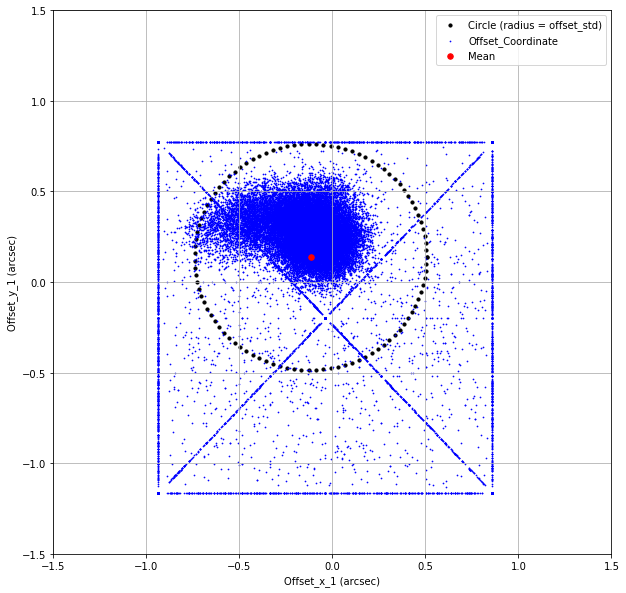

In [0]:
mx = data.a.offsetcentroid[0][:, 0].mean()
my = data.a.offsetcentroid[0][:, 1].mean()
std1 = sqrt((data.a.offsetcentroid[0][:, 0].std())**2 + (data.a.offsetcentroid[0][:, 1].std())**2)
theta = np.linspace(0, 2 * pi, 100)
x = np.cos(theta)*std1 + mx
y = np.sin(theta)*std1 + my
fig = plt.figure(figsize = (10, 10))
circle = plt.scatter(x, y, s = 10, c = 'k')
offset = plt.scatter(data.a.offsetcentroid[0][:,0], data.a.offsetcentroid[0][:,1], s = 0.5, c = 'b')
mean = plt.scatter(mx, my, s = 30, c = 'r')
plt.xlabel('Offset_x_0 (arcsec)')
plt.ylabel('Offset_y_0 (arcsec)')
plt.legend([circle, offset, mean], ['Circle (radius = offset_std)', 'Offset_Coordinate', 'Mean'], loc = 'upper right')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.grid()
plt.show()

Number: 152

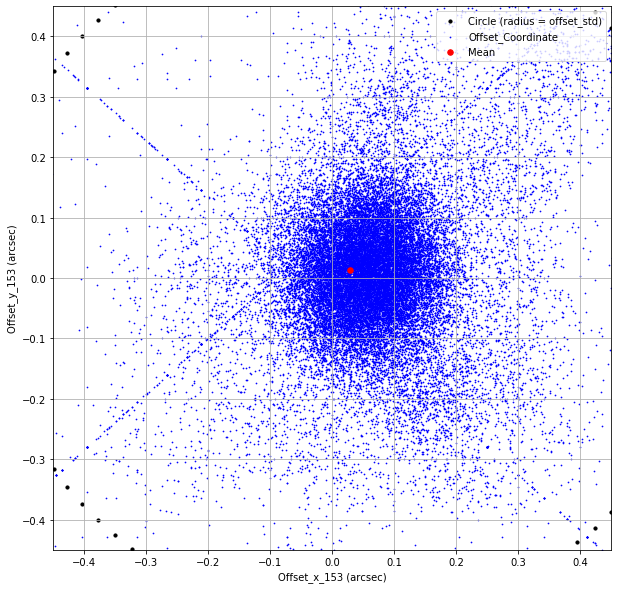

In [0]:
mx = data.a.offsetcentroid[0][:, 304].mean()
my = data.a.offsetcentroid[0][:, 305].mean()
std1 = sqrt((data.a.offsetcentroid[0][:, 304].std())**2 + (data.a.offsetcentroid[0][:, 305].std())**2)
theta = np.linspace(0, 2 * pi, 100)
x = np.cos(theta)*std1 + mx
y = np.sin(theta)*std1 + my
fig = plt.figure(figsize = (10, 10))
circle = plt.scatter(x, y, s = 10, c = 'k')
offset = plt.scatter(data.a.offsetcentroid[0][:,304], data.a.offsetcentroid[0][:,305], s = 0.5, c = 'b')
mean = plt.scatter(mx, my, s = 30, c = 'r')
plt.xlabel('Offset_x_152 (arcsec)')
plt.ylabel('Offset_y_152 (arcsec)')
plt.legend([circle, offset, mean], ['Circle (radius = offset_std)', 'Offset_Coordinate', 'Mean'], loc = 'upper right')
plt.xlim(-0.45,0.45)
plt.ylim(-0.45,0.45)
plt.grid()
plt.show()

Number: 303

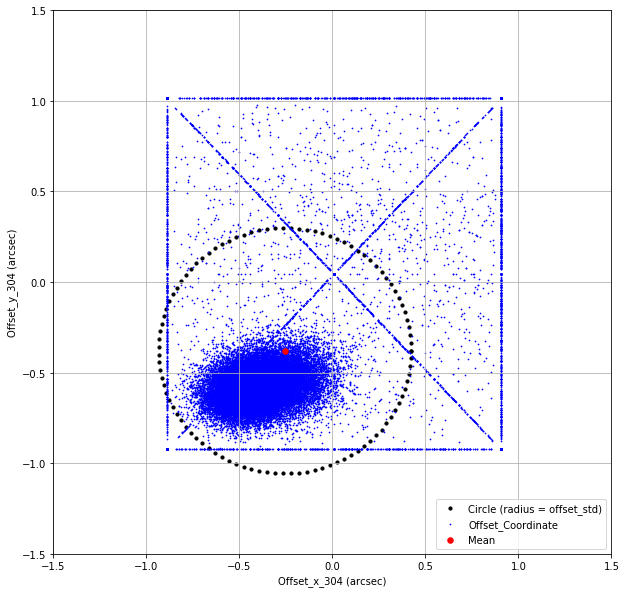

In [0]:
mx = data.a.offsetcentroid[0][:, 606].mean()
my = data.a.offsetcentroid[0][:, 607].mean()
std1 = sqrt((data.a.offsetcentroid[0][:, 606].std())**2 + (data.a.offsetcentroid[0][:, 607].std())**2)
theta = np.linspace(0, 2 * pi, 100)
x = np.cos(theta)*std1 + mx
y = np.sin(theta)*std1 + my
fig = plt.figure(figsize = (10, 10))
circle = plt.scatter(x, y, s = 10, c = 'k')
offset = plt.scatter(data.a.offsetcentroid[0][:,606], data.a.offsetcentroid[0][:,607], s = 0.5, c = 'b')
mean = plt.scatter(mx, my, s = 30, c = 'r')
plt.xlabel('Offset_x_303 (arcsec)')
plt.ylabel('Offset_y_303 (arcsec)')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.legend([circle, offset, mean], ['Circle (radius = offset_std)', 'Offset_Coordinate', 'Mean'], loc = 'lower right')
plt.grid()
plt.show()


### Plot for standard deviation of 304 offset centroids over timestamps:

In this part, we get the standard deviation of the offset centroids for each sub-aperture, and plot them into one diagram. The size and color of each spot on the diagram show the relative size of each standard deviation. The plot shows that the STDs of spots on the edge of the whole lenslet array are usually larger than that of spots away from edge. 

In [0]:
txt_file = open("sub_ap_map.txt", 'r')

exact_x = []
exact_y = []
start_y = 0.1
count = 0
for info in txt_file.readlines():
    start_x = 0.1
   
    line = list(info)
    for i in line:
        if i is not " " and i is not '\n':
            if int(i) != 0:
                exact_x.append(start_x)
                exact_y.append(start_y)
            start_x += 0.2
    start_y += 0.2

str_txt = [str(i) for i in range(304)]

In [0]:
std_all = np.sqrt(np.std(data.a.offsetcentroid[0][:,range(0, 608, 2)], axis = 0)**2 + np.std(data.a.offsetcentroid[0][:,range(1, 608, 2)])**2)
len(std_all)

304

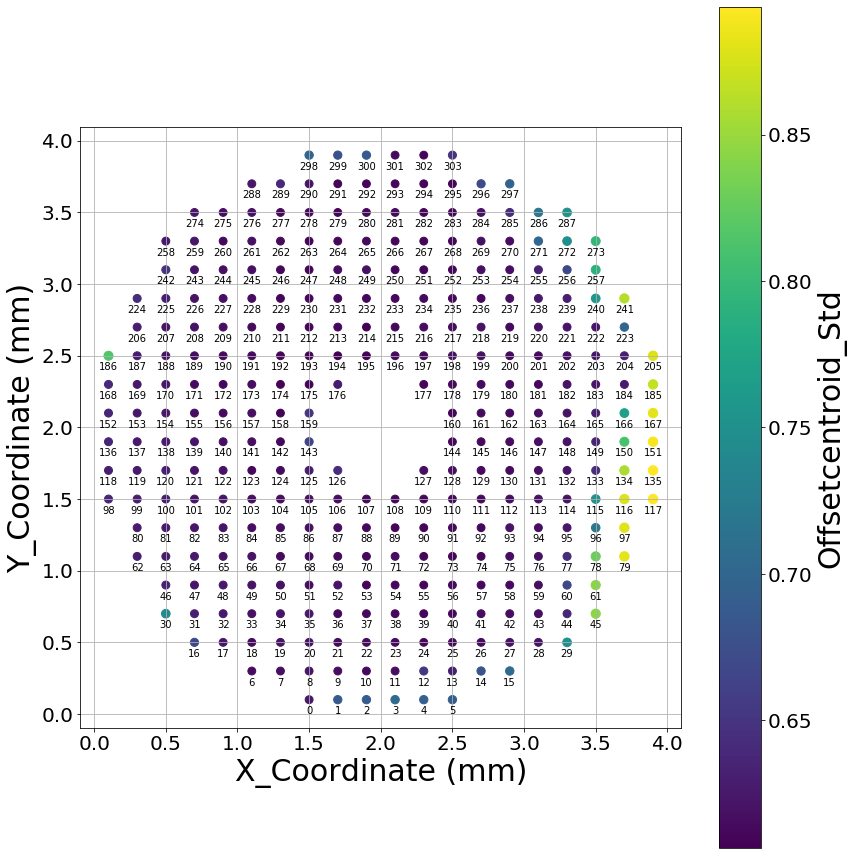

In [0]:
cmap = mpl.cm.viridis
a = pd.Series(std_all)
fig = plt.figure(figsize = (12, 12))
plt.scatter(exact_x, exact_y, s = a * 100, c = a, cmap = cmap) ## For different files, we might need to change the size "s=a*100", to "s=a*500"
                                                               ## or other number to make it easier to see
ax = plt.gca()
ax.set_aspect('equal')
plt.colorbar().set_label(label = 'Offsetcentroid_Std', size = 30)
fig2 = plt.gcf()
cbar_ax = fig2.axes[-1]
cbar_ax.tick_params(labelsize=20)

i = 0
while i < 304:
    plt.text(exact_x[i], exact_y[i] - 0.1, str_txt[i],horizontalalignment='center')
    i += 1
        
plt.xlabel('X_Coordinate (mm)', fontsize = 30)
plt.ylabel('Y_Coordinate (mm)', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tight_layout()
plt.grid()
plt.show()

### Plot for residual rms wavefront:

The way we interpret entry "residualrms" is that the system takes a average plane of an incoming wavefront, and calculates the STDs of the real wavefront relative to the average plane, and this one number is calculated for each timestamp. Therefore, we expect this number to be in the order of $10^2$ ~ $10^3$ nm.

But within these 5 files, there is one file with pretty large residual rms: $\textbf{n0130_LGS_trs.sav}$. We still don't know the reason that causes this to happen.

Text(0, 0.5, 'residual_rms (nm)')

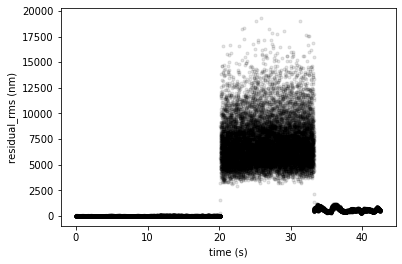

In [0]:
res = data.a.residualrms[0][0]
x = np.linspace(0, len(res)/1000, len(res))
plt.plot(x, data.a.residualrms[0][0], 'k.', alpha = 0.1, linewidth = 0.5)
plt.xlabel('time (s)')
plt.ylabel('residual_rms (nm)')

## Part 3: Comparison between Telemetry & Atmospheric Condition:

This is the part we are trying to explore recently but met problems. 

The idea is that we synchronize the data from telemetry and atmospheric conditions, and try to explore if we can get some correlations between rms errors taken from these two data table.

For each telemetry files, we get out one number for each entry by averaging over timestamps and(or) averaging over space:
    
residual_rms: average over timestamps

residual_rms_std: over timestamps

apd_counts & apd_counts_std: first average over space, then over timestamps

subap_intensity & subap_intensity_std: first get STDs from offsetcentroids over time for each sub-aperture, then mask the sub-apertures with large STDs. Then use the entry: subapintensity, average over space, then over time.

### Read tables:

These two fits tables are also included in the shared google drive folder.

In [0]:
### read the table of telemetry parameters extracted from each file
file = 'telemetry_table.fits'  
datatable = Table.read(file, format = 'fits')
df_tele = datatable.to_pandas()
df_tele

,telemetry_file,residual_rms,residual_rms_std,dttcentroid_std,apdcounts_mean,apdcounts_std,subap_mean,subap_std
0,b'/g/lu/data/keck_telemetry/20170808/sdata904/...,186.683502,44.848091,0.094491,1345.247083,43.790513,953.2481,25.648037
1,b'/g/lu/data/keck_telemetry/20170808/sdata904/...,175.505966,42.517288,0.091745,1411.299962,51.874142,1055.4020,70.498830
2,b'/g/lu/data/keck_telemetry/20170808/sdata904/...,176.941437,41.470917,0.092826,1394.017125,48.734094,1052.3933,35.656350
3,b'/g/lu/data/keck_telemetry/20170808/sdata904/...,184.019043,42.253811,0.087931,1452.044976,51.271221,1120.1442,51.246082
4,b'/g/lu/data/keck_telemetry/20170808/sdata904/...,127.989845,36.450329,0.088655,1437.777381,44.102452,1079.3201,25.328535
...,...,...,...,...,...,...,...,...
951,b'/g/lu/data/keck_telemetry/20170505/sdata904/...,197.605682,25.227322,0.075719,508.426757,29.485158,3551.5127,108.884640
952,b'/g/lu/data/keck_telemetry/20170505/sdata904/...,189.453308,21.780739,0.076085,507.620802,26.348731,3561.8208,94.474750
953,b'/g/lu/data/keck_telemetry/20170505/sdata904/...,200.871948,17.234070,0.075757,500.465848,25.016485,3478.5872,56.186638
954,b'/g/lu/data/keck_telemetry/20170505/sdata904/...,202.775925,22.670071,0.075731,511.223351,25.079362,3446.4854,57.688200


In [0]:
### read the table containing metadata including synchronized atmospheric conditions
### (the timing of each file is correlated with each telemetry file)
file2 = 'metadata_table.fits'
datatable2 = Table.read(file2, format = 'fits')
df_meta = datatable2.to_pandas()
df_meta

,file,strehl,rms_err,fwhm,mjd,epoch,airmass,itime,coadds,band,az,dmgain,dtgain,wsfrrt,aolbfwhm,lsamppwr,lgrmswf,xref,yref,xstrehl,ystrehl,MASS,MASS_mjd,MASS_delta_t,DIMM,DIMM_mjd,DIMM_delta_t,MASSPRO_half,MASSPRO_1,MASSPRO_2,MASSPRO_4,MASSPRO_8,MASSPRO_16,MASSPRO,MASSPRO_mjd,MASSPRO_delta_t,wind_speed[kts],wind_speed,wind_direction,temperature,relative_humidity,pressure[mb],pressure,cfht_mjd,cfht_delta_t,telemetry_file
0,b'c0087.fits',0.121,491.7,104.67,57973.25592,b'17auglgs1',1.56658,2.8,10.0,b'Kp',165.07650,0.4,0.15,440.0,1.009680,22.112240,272.7,421.267,691.635,520.552,402.546,0.40,57973.261424,-0.005504,0.48,57973.256181,-0.000261,2.830000e-22,2.750000e-23,3.490000e-21,3.510000e-14,1.680000e-13,9.530000e-15,0.50,57973.260741,-0.004821,7.0,3.601111,93.0,2.64,24.0,620.5,0.6205,57973.256250,-0.000330,b'/u/steverobinson/data/keck_telemetry/2017080...
1,b'c0088.fits',0.150,465.4,93.87,57973.25651,b'17auglgs1',1.56489,2.8,10.0,b'Kp',165.30859,0.4,0.15,440.0,1.266017,22.034380,297.4,424.132,691.729,523.677,402.444,0.40,57973.261424,-0.004914,0.48,57973.256181,0.000329,2.830000e-22,2.750000e-23,3.490000e-21,3.510000e-14,1.680000e-13,9.530000e-15,0.50,57973.260741,-0.004231,7.0,3.601111,93.0,2.64,24.0,620.5,0.6205,57973.256250,0.000260,b'/u/steverobinson/data/keck_telemetry/2017080...
2,b'c0089.fits',0.169,451.0,85.63,57973.25709,b'17auglgs1',1.56328,2.8,10.0,b'Kp',165.53884,0.4,0.20,440.0,1.219158,22.034380,295.5,425.229,691.019,524.783,401.803,0.40,57973.261424,-0.004334,0.48,57973.257199,-0.000109,2.830000e-22,2.750000e-23,3.490000e-21,3.510000e-14,1.680000e-13,9.530000e-15,0.50,57973.260741,-0.003651,7.0,3.601111,95.0,2.63,24.0,620.5,0.6205,57973.256944,0.000146,b'/u/steverobinson/data/keck_telemetry/2017080...
3,b'c0090.fits',0.127,485.7,101.55,57973.25779,b'17auglgs1',1.56134,2.8,10.0,b'Kp',165.81507,0.4,0.20,440.0,1.142389,22.103079,327.5,452.963,720.375,552.825,431.097,0.40,57973.261424,-0.003634,0.48,57973.258229,-0.000439,2.830000e-22,2.750000e-23,3.490000e-21,3.510000e-14,1.680000e-13,9.530000e-15,0.50,57973.260741,-0.002951,8.0,4.115556,83.0,2.63,24.0,620.5,0.6205,57973.257639,0.000151,b'/u/steverobinson/data/keck_telemetry/2017080...
4,b'c0091.fits',0.138,475.7,95.98,57973.25838,b'17auglgs1',1.55976,2.8,10.0,b'Kp',166.04869,0.4,0.20,440.0,1.226177,22.084761,343.8,452.560,719.203,552.134,430.044,0.40,57973.261424,-0.003044,0.48,57973.258229,0.000151,2.830000e-22,2.750000e-23,3.490000e-21,3.510000e-14,1.680000e-13,9.530000e-15,0.50,57973.260741,-0.002361,7.0,3.601111,91.0,2.62,23.0,620.5,0.6205,57973.258333,0.000047,b'/u/steverobinson/data/keck_telemetry/2017080...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,b'c1280.fits',0.276,383.8,62.30,57878.60952,b'17maylgs1',1.65075,2.8,10.0,b'Kp',203.03754,0.4,0.10,1000.0,0.870697,22.483219,234.7,409.847,667.213,509.855,378.590,0.13,57879.260069,-0.650549,0.40,57879.239248,-0.629728,1.590000e-23,5.040000e-22,2.710000e-20,5.290000e-15,2.060000e-14,8.730000e-15,0.17,57879.255787,-0.646267,10.0,5.144444,68.0,2.82,11.0,619.2,0.6192,57878.609722,-0.000202,b'/u/steverobinson/data/keck_telemetry/2017050...
952,b'c1281.fits',0.315,363.4,60.11,57878.61011,b'17maylgs1',1.65376,2.8,10.0,b'Kp',203.24851,0.4,0.10,1000.0,0.993479,22.492380,234.0,410.231,665.855,510.221,377.152,0.13,57879.260069,-0.649959,0.40,57879.239248,-0.629138,1.590000e-23,5.040000e-22,2.710000e-20,5.290000e-15,2.060000e-14,8.730000e-15,0.17,57879.255787,-0.645677,9.0,4.630000,69.0,2.83,11.0,619.2,0.6192,57878.610417,-0.000307,b'/u/steverobinson/data/keck_telemetry/2017050...
953,b'c1282.fits',0.380,332.6,55.86,57878.61072,b'17maylgs1',1.65690,2.8,10.0,b'Kp',203.46555,0.4,0.10,1000.0,0.931398,22.483219,190.8,449.480,671.582,550.296,382.849,0.13,57879.260069,-0.649349,0.40,57879.239248,-0.628528,1.590000e-23,5.040000e-22,2.710000e-20,5.290000e-15,2.060000e-14,8.730000e-15,0.17,

In these 2 tables, we can get several entries out that we expect them to be wavefront error: "rms_err" and "lgswfrms" from metadata table, and "residual_rms" from telemetry table.

### Plot these entries:

We begin to meet problems when we try to plot them together to see correlations. There are only pretty weak correlations.

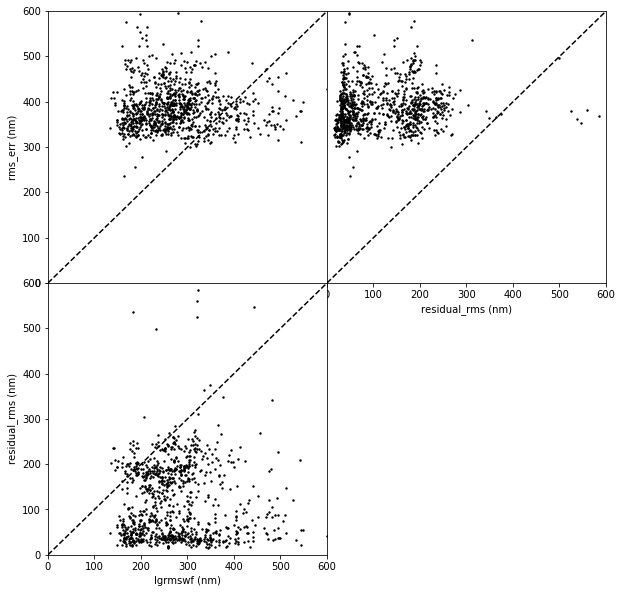

In [0]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
plt.subplots_adjust(hspace = 0, wspace = 0)

x = np.linspace(0,1000,1000)
y = x
ax1 = ax[0,0]
ax2 = ax[0,1]
ax3 = ax[1,0]
ax4 = ax[1,1].axis('off')

# Uncommenting the additional ax.scatter calls below will colorize based on delta t
ax1.scatter(df_meta['lgrmswf'], df_meta['rms_err'],s = 2, c = 'k')
# ax1.scatter(df['DIMM'], df['MASS'], s = 4, c = np.abs(df['DIMM_mjd'] - df['MASS_mjd']), cmap = 'viridis_r')
ax1.plot(x,y, color = 'k', linestyle = '--')
ax1.set_xlim(0,600)
ax1.set_ylim(0,600)
ax1.set_xticks([])
ax1.set_ylabel('rms_err (nm)')

ax2.scatter(df_tele['residual_rms'], df_meta['rms_err'],s = 2, c = 'k')
# ax2.scatter(df['MASSPRO'], df['MASS'], s = 4, c = np.abs(df['MASSPRO_mjd'] - df['MASS_mjd']), cmap = 'viridis_r')
ax2.plot(x,y, color = 'k', linestyle = '--')
ax2.set_xlabel('residual_rms (nm)')
ax2.set_yticks([])
#ax2.set_xticks([0.2,0.4,0.6,0.8,1])
ax2.set_xlim(0,600)
ax2.set_ylim(0,600)

ax3.scatter(df_meta['lgrmswf'], df_tele['residual_rms'], s = 2, c = 'k')
# ax3.scatter(df['DIMM'], df['MASSPRO'], s = 4, c = np.abs(df['DIMM_mjd'] - df['MASSPRO_mjd']), cmap = 'viridis_r')
ax3.plot(x,y, color = 'k', linestyle = '--')
ax3.set_ylabel('residual_rms (nm)')
#ax3.set_yticks([0,0.2,0.4,0.6,0.8])
ax3.set_xlim(0,600)
ax3.set_ylim(0,600)
ax3.set_xlabel('lgrmswf (nm)')


plt.show()

### Dataframe for wavefront errors:

Then we can make a pandas dataframe just contains these wavefront error entries:

In [0]:
df3 = pd.DataFrame()
df3['rms_err'] = df_meta['rms_err']
df3['lgrmswf'] = df_meta['lgrmswf']
df3['residual_rms'] = df_tele['residual_rms']
df3['residual_rms_std'] = df_tele['residual_rms_std']

Then we can explore correlations between different entries:

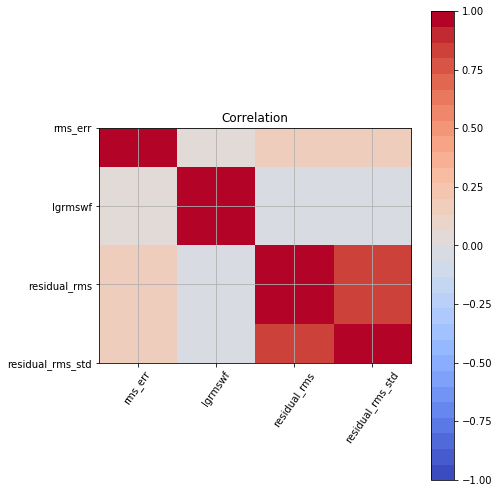

In [0]:
fig = plt.figure(figsize = (7, 7))
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('coolwarm', 30)
cax = ax1.imshow(df3.corr(),interpolation="nearest", cmap=cmap, vmin = -1, vmax = 1)
ax1.grid(True)
plt.title('Correlation')
labels = df3.columns
ax1.set_xticks(range(len(labels)))
ax1.set_yticks(range(len(labels)))
ax1.set_xticklabels(labels,fontsize=10,rotation=55)
ax1.set_yticklabels(labels)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax)
#fig.clim(-1, 1)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


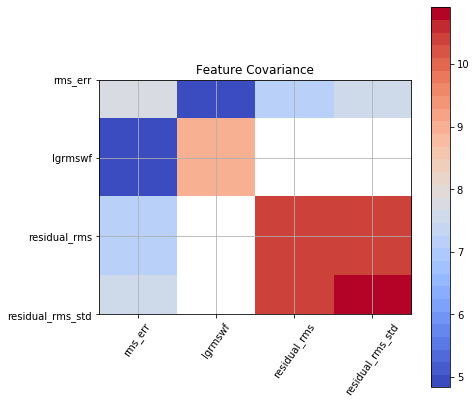

In [0]:
fig = plt.figure(figsize = (7, 7))
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('coolwarm', 30)
cax = ax1.imshow(np.log(df3.cov()), interpolation="nearest", cmap=cmap)
ax1.grid(True)
plt.title('Feature Covariance')
labels = df3.columns
ax1.set_xticks(range(len(labels)))
ax1.set_yticks(range(len(labels)))
ax1.set_xticklabels(labels,fontsize=10,rotation=55)
ax1.set_yticklabels(labels,fontsize=10)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax)
#plt.tight_layout()
plt.show()

## Part 4: Questions Unresolved:

There are still a lot of questions and problems that we are not sure about what the answers are.

#### $\textbf{1. Wavefront Residual:}$
If we want to calculate a wavefront error from the entry "residualwavefront", how do we combine tip-tilt & defocus residuals with residual from actuators?

In [0]:
data.a.residualwavefront[0].shape

(42516, 352)

So, there are 352 columns in this entry, the first 349 are for actuators, 350 & 351 are for tip-tilt, 352 is for defocus: 

In [0]:
res = data.a.residualwavefront[0]

In [0]:
res[:,351] ## This is the column for defocus, if the unit is in microns (as written in the document)
           ## how should we combine this with other residuals?

array([ 20.420372 ,  10.660999 ,   4.3966236, ..., -32.57804  ,
       -30.67238  , -27.56459  ], dtype=float32)

Also, since Down tip-tilt information is saved in data structure b, and the residual is "DTTCENTROIDS" in arcsecond, how should we add this to the whole wavefront error?

In [0]:
data.b.dttcentroids[0]

array([[ 0.02740397, -0.0082182 ],
       [-0.11305894, -0.06022151],
       [ 0.05994171,  0.02399442],
       ...,
       [-0.03792893, -0.00268113],
       [ 0.07520908,  0.07781781],
       [ 0.02817778,  0.0361318 ]], dtype=float32)

#### $\textbf{2. Large residual rms}$

If we load the file "n0130_LGS_trs.sav", the residual_rms plot returns really large number in some timestamps, and we don't know the exact reasons for that:

Text(0, 0.5, 'residual_rms (nm)')

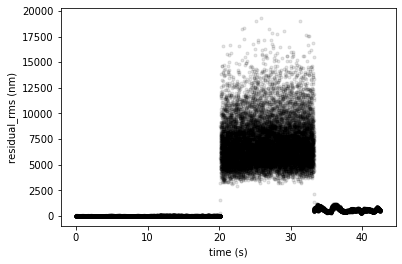

In [0]:
res = data.a.residualrms[0][0]
x = np.linspace(0, len(res)/1000, len(res))
plt.plot(x, data.a.residualrms[0][0], 'k.', alpha = 0.1, linewidth = 0.5)
plt.xlabel('time (s)')
plt.ylabel('residual_rms (nm)')

#### $\textbf{3. Correlation between Tables:}$
There are almost no correlation between different entries of wavefront error coming from these two tables, we don't know the reason for it:

In [0]:
df3.corr()

,rms_err,lgrmswf,residual_rms,residual_rms_std
rms_err,1.000000,0.028692,0.158733,0.158352
lgrmswf,0.028692,1.000000,-0.009389,-0.031890
residual_rms,0.158733,-0.009389,1.000000,0.840365
residual_rms_std,0.158352,-0.031890,0.840365,1.000000


## Part 5: Things could be done next:

#### 1. Figure out entries from telemetry, especially those needed for understanding wavefront residuals.

#### 2. Further explore the correlation between telemetry entries, with different entries in meta data table.